In [1]:
"""
Created on 05/01/2023
Group 2
Authors: S.V.
License: this code is released under the CeCILL 2.1 license. See
https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt
"""

'\nCreated on 05/01/2023\nGroup 2\nAuthors: S.V.\nLicense: this code is released under the CeCILL 2.1 license. See\nhttps://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt\n'

In [2]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("data_v2.csv", )

# deleting useless variables
data = data.drop(['Unnamed: 0', 'loc_initiator_z', 'protocol', 'ranging_unit', 'initiator', 'register_dump_CIR'], axis=1)
data

,target,nlos_indicator,t1,t2,t3,t4,skew,tof,tof_skew,range,...,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,orientation
0,100,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,1745.608935,7.607739,...,0.000000,30.980000,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,270.0
1,100,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,1687.497019,7.659333,...,0.000000,30.980000,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,270.0
2,100,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,1674.791667,7.659333,...,0.000000,30.980000,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,270.0
3,100,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,1686.709409,7.668714,...,0.000000,30.980000,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,270.0
4,100,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,1685.436774,7.715617,...,0.000000,30.980000,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,184,3.075243,301428484750,302000434919,302102988430,301531040251,-9.382925,995,1476.125937,4.666893,...,6.999961,41.810001,46.939999,1654930833773,4231,-80.229179,-79.428015,-79.342829,-79.666674,119.0
3942,184,3.085177,375355600014,375928251294,376031194254,375458544956,-8.306196,991,1418.532184,4.648132,...,6.999961,41.525002,47.319996,1654930834930,4237,-80.196487,-79.576395,-79.985511,-79.919464,119.0
3943,184,2.674524,449294310542,449867663034,449970544782,449397194279,-8.952233,994,1455.010695,4.662203,...,6.999961,41.810001,46.939999,1654930836088,4243,-80.158638,-79.435472,-79.234453,-79.609521,119.0
3944,184,2.727551,523279420046,523853474064,523955982478,523381930458,-8.490778,999,1434.188082,4.685655,...,6.999961,41.240002,46.559998,1654930837246,4249,-80.229492,-79.554364,-79.599858,-79.794571,119.0


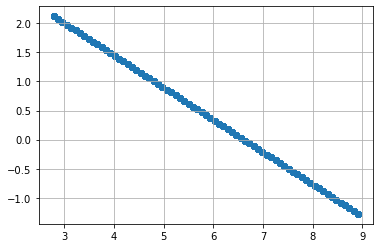

a =  -0.5548735684921144  et b =  3.6697196927161606
loc_iniatiator_y =  -0.5548735684921144  * loc_initiator_x +  3.6697196927161606


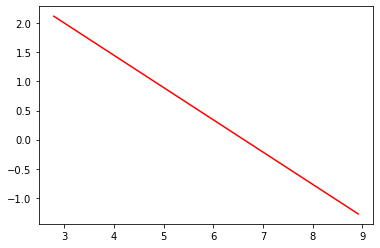

In [4]:
# Linear Regression to have x as a function of y of the form x=a*y+b
# with x : loc_initiator_y and y : loc_initiator_x
# a= -0.5548 et b= 3.6679

from scipy import stats

def predict(y):
    return slope * y + intercept

X =  data.loc_initiator_y
Y =  data.loc_initiator_x

axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

fitLine = predict(X)
plt.plot(X, fitLine, c='r')

print("a = ", slope, " et b = ", intercept)
print("loc_iniatiator_y = ", slope, " * loc_initiator_x + ", intercept)

# Linear regression

### Train the model

In [5]:
# Variable names
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["loc_initiator_y", "loc_initiator_x"]]  # remove variable names from loc_initiator_y and loc_initiator_x 

# The variable we'll be predicting on
variable_predict = "loc_initiator_y"

# Generate the training set
train = data.sample(frac=0.8, random_state=1)  # random_state : to be able to replicate results

# Select anything not in the training set and put it in the testing set
test = data.loc[~data.index.isin(train.index)]

# Print the shapes of both sets
print("Training set shape :", train.shape)
print("Testing set shape :", test.shape)

# Initialize the model class
lin_model = LinearRegression()

# Fit the model to the training data
lin_model.fit(train[columns], train[variable_predict])

Training set shape : (3157, 28)
Testing set shape : (789, 28)


LinearRegression()

### Do predictions

In [6]:
# Generate our predictions for the test set
lin_predictions = lin_model.predict(test[columns])
print("Predictions :", lin_predictions)

# Compute error between our test predictions and the actual values
lin_mse = mean_squared_error(lin_predictions, test[variable_predict])
print("Mean squared error :", lin_mse)

Predictions : [2.88027531 2.88029711 2.88029377 2.96793827 2.9679498  3.05482426
 3.14214265 3.2297417  3.31707758 3.404727   3.40471908 3.40471185
 3.49202498 3.57968266 3.57967694 3.57966481 3.66696611 3.66696246
 3.66699661 3.75425881 3.75429163 3.75430997 3.75431095 3.75431475
 3.84196633 3.92925287 4.01688896 4.01688217 4.01689149 4.10423266
 4.10422352 4.10420463 4.19184774 4.1918957  4.27917272 4.36680955
 4.36685052 4.3668224  4.45417668 4.54103363 4.62911377 4.71599259
 4.71599963 4.80405288 4.89094253 4.89096095 4.97900593 4.97901939
 4.97899855 4.97899948 4.97898351 4.97900706 5.06588267 5.06591044
 5.15398422 5.15398292 5.24085784 5.24084967 5.24087328 5.41583853
 5.50312368 5.67806189 5.67805364 5.67804608 5.76571932 5.76572337
 5.76571635 5.8529885  5.85305353 5.85302662 5.94107057 5.94109159
 5.94110123 6.02795789 6.11526548 6.11529445 6.20295899 6.29023035
 6.29026415 6.29022618 6.29023739 6.29026455 6.46521861 6.5528283
 6.55283636 6.64017678 6.64015749 6.6401473  6.64

We have mean squared error equal to 0, so the model doesn't seem to have any error.

## Other method  (the best)

In [18]:
X = data.drop(['loc_initiator_y', 'loc_initiator_x'], axis=1)
y = data.loc_initiator_y

# train base and test base
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3156, 26)
(790, 26)
(3156,)
(790,)


In [19]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Evaluation of the training set
from sklearn.metrics import r2_score
y_train_predict = linear_model.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)
 
print("Model performance based on training set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_train))
print("The R-squared is {}".format(r2_train))
print("\n")
 
# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)
 
print("Model performance based on testing set : ")
print("--------------------------------------")
print("The mean squared error is {}".format(rmse_test))
print("The R-squared is {}".format(r2_test))


Model performance based on training set : 
--------------------------------------
The mean squared error is 0.00015962095203407649
The R-squared is 0.9999999918370538


Model performance based on testing set : 
--------------------------------------
The mean squared error is 0.00016800929857083187
The R-squared is 0.9999999912191188


In [32]:
a = linear_model.coef_
b = linear_model.intercept_

In [43]:
a

array([-6.17236319e-07,  5.60854588e-07, -8.22230079e-06,  8.22227376e-06,
       -8.22227377e-06,  8.22230080e-06, -4.79497305e-04, -7.18405406e-06,
        8.36711249e-07,  2.23516607e-06, -2.10901331e-06, -2.17035053e-03,
        1.36457170e-05, -2.87471568e-05,  2.51371771e-03, -2.15003100e-03,
        8.74484960e-01,  3.43222851e-06, -1.28636752e-05, -2.89289379e-09,
        6.09270026e-07,  6.93553799e-07,  1.56965596e-06, -2.78421350e-06,
       -1.73667969e-07,  4.72895374e-07])

The MSE is approximatly equal to 0 and the R-squared approximatly 1, this means that the difference between what we predict and what we have is very small.

### Graphics

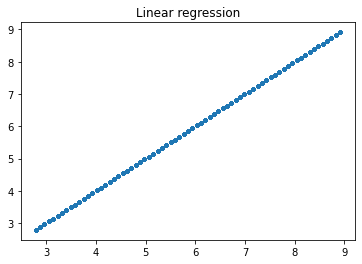

In [35]:
plt.plot(y, linear_model.predict(X),'.')
plt.title("Linear regression")
plt.show()

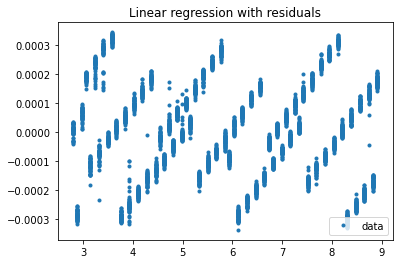

In [45]:
plt.plot(y, y-linear_model.predict(X), '.', label="data")
#plt.plot(X, a * X + b, "r-", label="regression")
plt.title("Linear regression with residuals")
plt.legend(loc="lower right")
plt.show()